In [24]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-12-16T11:10:17.634Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 10322}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11843, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [26]:
type(data)

dict

In [72]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11843,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.979683e+07,1.979683e+07,False,NaN,1,NaN,NaN,None,2024-12-16T11:09:00.000Z,104717.929270,6.643540e+10,71.1255,0.159699,2.427280,6.435313,14.656451,55.942928,77.019070,2.073083e+12,56.3511,2.199077e+12,None,2024-12-16T11:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 13:29:48.026370
1,1027,Ethereum,ETH,ethereum,9684,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204502e+08,1.204502e+08,True,NaN,2,NaN,NaN,None,2024-12-16T11:09:00.000Z,3946.667976,3.111557e+10,12.3923,-0.015700,2.173450,2.154640,25.982568,51.195364,70.466326,4.753770e+11,12.9218,4.753770e+11,None,2024-12-16T11:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 13:29:48.026370
2,825,Tether USDt,USDT,tether,108490,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.402537e+11,1.434428e+11,True,NaN,3,NaN,NaN,None,2024-12-16T11:09:00.000Z,0.999441,1.387540e+11,37.8389,-0.022392,-0.033112,-0.040809,-0.048593,-0.034196,-0.058512,1.401753e+11,3.8103,1.433627e+11,None,2024-12-16T11:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-16 13:29:48.026370
3,52,XRP,XRP,xrp,1478,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.718787e+10,9.998686e+10,False,NaN,4,NaN,NaN,None,2024-12-16T11:09:00.000Z,2.385362,6.606806e+09,8.2992,0.045792,-1.298006,-0.116017,124.172561,328.276167,306.261637,1.364138e+11,3.7080,2.385362e+11,None,2024-12-16T11:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 13:29:48.026370
4,5426,Solana,SOL,solana,809,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.791417e+08,5.902446e+08,True,NaN,5,NaN,NaN,None,2024-12-16T11:09:00.000Z,217.312851,3.891428e+09,32.8583,-0.295209,-0.407074,-4.119170,-0.418761,42.769878,63.649610,1.041236e+11,2.8303,1.282677e+11,None,2024-12-16T11:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 13:29:48.026370
5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440083e+08,1.440083e+08,False,NaN,6,NaN,NaN,None,2024-12-16T11:09:00.000Z,709.155507,2.036535e+09,13.6282,0.258802,-0.225680,-1.365499,13.215053,19.576268,30.634111,1.021243e+11,2.7760,1.021243e+11,None,2024-12-16T11:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 13:29:48.026370
6,74,Dogecoin,DOGE,dogecoin,1128,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.472232e+11,1.472232e+11,True,NaN,7,NaN,NaN,None,2024-12-16T11:09:00.000Z,0.399048,3.126104e+09,-2.2764,-0.180878,0.127923,-8.112133,6.431585,224.727724,294.821510,5.874908e+10,1.5969,5.874908e+10,None,2024-12-16T11:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 13:29:48.026370
7,3408,USDC,USDC,usd-coin,23864,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.209295e+10,4.209295e+10,False,NaN,8,NaN,NaN,None,2024-12-16T11:09:00.000Z,0.999794,9.490538e+09,54.2712,-0.008694,-0.025819,-0.011470,0.011813,-0.017394,-0.024850,4.208427e+10,1.1439,4.208427e+10,None,2024-12-16T11:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-16 13:29:48.026370
8,2010,Cardano,ADA,cardano,1404,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.5000

In [76]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    df

    if not os.path.isfile(r'C:\Users\carlo\Desktop\Python Projects\Automating Crypto Website\API.csv'):
        df.to_csv(r'C:\Users\carlo\Desktop\Python Projects\Automating Crypto Website\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\carlo\Desktop\Python Projects\Automating Crypto Website\API.csv', mode='a', header=False)




In [158]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [162]:
df23 = pd.read_csv(r'C:\Users\carlo\Desktop\Python Projects\Automating Crypto Website\API.csv')
df23

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11843,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19796953.00000,19796953.00000,False,NaN,1,NaN,NaN,NaN,2024-12-16T17:54:00.000Z,106779.16549,83344497418.71021,88.57850,-0.01337,3.62284,9.33884,17.33670,58.51704,75.25848,2113902120569.98828,56.22150,2242362475274.33984,NaN,2024-12-16T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 18:54:43.917328
1,1,1027,Ethereum,ETH,ethereum,9687,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120450223.41770,120450223.41770,True,NaN,2,NaN,NaN,NaN,2024-12-16T17:54:00.000Z,4017.63414,39949340685.83066,61.52840,1.43788,2.79401,4.50174,26.53485,53.99893,69.60815,483924929582.10797,12.87790,483924929582.10999,NaN,2024-12-16T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 18:54:43.917328
2,2,52,XRP,XRP,xrp,1481,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57187870382.00000,99986858106.00000,False,NaN,3,NaN,NaN,NaN,2024-12-16T17:54:00.000Z,2.49235,10843817840.19700,106.09450,-0.62984,2.36834,3.58397,120.92435,351.68136,322.94691,142532006628.76187,3.78960,249234681544.67999,NaN,2024-12-16T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 18:54:43.917328
3,3,825,Tether USDt,USDT,tether,108566,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,140253672849.44351,143442815980.71503,True,NaN,4,NaN,NaN,NaN,2024-12-16T17:53:00.000Z,0.99989,169491991480.01111,66.78370,0.00388,0.02054,0.00302,-0.03378,0.00866,-0.01189,140237809431.55722,3.73190,143426591854.20001,NaN,2024-12-16T17:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-16 18:54:43.917328
4,4,5426,Solana,SOL,solana,810,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,479139689.25928,590242636.40074,True,NaN,5,NaN,NaN,NaN,2024-12-16T17:53:00.000Z,219.43237,4897172499.72682,68.83840,0.50097,-0.91285,-2.12375,1.63975,46.40782,64.34142,105138755911.35851,2.79540,129518338530.77000,NaN,2024-12-16T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 18:54:43.917328
5,5,1839,BNB,BNB,bnb,2306,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144008215.79000,144008215.79000,False,NaN,6,NaN,NaN,NaN,2024-12-16T17:54:00.000Z,723.81819,2257097057.86007,27.20840,0.56383,0.71278,0.54085,14.98906,22.64232,31.84436,104235766687.87720,2.77140,104235766687.88000,NaN,2024-12-16T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 18:54:43.917328
6,6,74,Dogecoin,DOGE,dogecoin,1128,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147227006383.70526,147227006383.70526,True,NaN,7,NaN,NaN,NaN,2024-12-16T17:54:00.000Z,0.40988,3890113258.19503,43.87690,0.45946,1.65459,-5.99968,9.52924,232.43167,302.16337,60344746211.05814,1.60590,60344746211.06000,NaN,2024-12-16T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-16 18:54:43.917328
7,7,3408,USDC,USDC,usd-coin,23883,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,42224144897.14955,42224144897.14955,False,NaN,8,NaN,NaN,NaN,2024-12-16T17:53:00.000Z,0.99972,11641872067.14560,84.57890,-0.01369,-0.02972,-0.03181,-0.01628,-0.02144,-0.01448,42212279331.35920,1.12180,42212279331.36000,NaN,2024-12-16T17:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86

In [164]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11844,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19797750.00000,19797750.00000,False,NaN,1,NaN,NaN,None,2024-12-18T10:21:00.000Z,104072.57813,77302016750.55789,-3.90390,-0.16912,-2.71838,6.15763,13.34478,52.28856,66.66411,2060402883729.14038,56.42820,2185524140789.33008,None,2024-12-18T10:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
1,1027,Ethereum,ETH,ethereum,9692,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120452072.76645,120452072.76645,True,NaN,2,NaN,NaN,None,2024-12-18T10:22:00.000Z,3862.41016,37196155356.49330,-13.63880,-0.07999,-3.79248,4.40686,24.18377,46.05180,58.89349,465235309253.82275,12.74380,465235309253.82001,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
2,52,XRP,XRP,xrp,1481,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57187870382.00000,99986858106.00000,False,NaN,3,NaN,NaN,None,2024-12-18T10:22:00.000Z,2.51912,18261520025.14392,25.60010,-0.07249,-4.58692,7.31369,121.39277,361.12914,331.82971,144063051947.04852,3.94880,251911901920.35999,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
3,825,Tether USDt,USDT,tether,108880,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,140607916018.81607,143442815980.35773,True,NaN,4,NaN,NaN,None,2024-12-18T10:22:00.000Z,0.99972,168620791987.32629,0.22180,0.01157,-0.00775,-0.06046,-0.02462,-0.01827,-0.03718,140568641357.11893,3.85050,143402749473.22000,None,2024-12-18T10:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-18 11:22:36.593007
4,5426,Solana,SOL,solana,810,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479178284.58717,590379456.13460,True,NaN,5,NaN,NaN,None,2024-12-18T10:22:00.000Z,216.36916,6788736232.75884,31.94230,-0.27701,-2.99969,-3.09288,-11.32940,39.59447,55.60217,103679401707.51874,2.84190,127739905503.39999,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
5,1839,BNB,BNB,bnb,2310,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144008069.29000,144008069.29000,False,NaN,6,NaN,NaN,None,2024-12-18T10:22:00.000Z,714.74224,2595970503.83622,17.59200,-0.13126,-1.09036,3.75625,15.12251,19.50767,28.50064,102928649330.50122,2.82130,102928649330.50000,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
6,74,Dogecoin,DOGE,dogecoin,1128,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147250136383.70523,147250136383.70523,True,NaN,7,NaN,NaN,None,2024-12-18T10:22:00.000Z,0.38630,4159980298.15771,14.33180,0.05435,-4.13603,-2.93131,3.90258,165.69533,269.56799,56883257291.52654,1.55820,56883257291.53000,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
7,3408,USDC,USDC,usd-coin,23963,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42536873109.55334,42536873109.55334,False,NaN,8,NaN,NaN,None,2024-12-18T10:22:00.000Z,0.99992,11361630067.16837,-0.63520,0.01950,-0.00482,-0.01145,0.00263,0.00169,0.00456,42533504769.66711,1.16570,42533504769.67000,None,2024-12-18T10:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991

In [168]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [172]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11844,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19797750.00000,19797750.00000,False,NaN,1,NaN,NaN,None,2024-12-18T10:21:00.000Z,104072.57813,77302016750.55789,-3.90390,-0.16912,-2.71838,6.15763,13.34478,52.28856,66.66411,2060402883729.14038,56.42820,2185524140789.33008,None,2024-12-18T10:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
1,1027,Ethereum,ETH,ethereum,9692,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120452072.76645,120452072.76645,True,NaN,2,NaN,NaN,None,2024-12-18T10:22:00.000Z,3862.41016,37196155356.49330,-13.63880,-0.07999,-3.79248,4.40686,24.18377,46.05180,58.89349,465235309253.82275,12.74380,465235309253.82001,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
2,52,XRP,XRP,xrp,1481,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57187870382.00000,99986858106.00000,False,NaN,3,NaN,NaN,None,2024-12-18T10:22:00.000Z,2.51912,18261520025.14392,25.60010,-0.07249,-4.58692,7.31369,121.39277,361.12914,331.82971,144063051947.04852,3.94880,251911901920.35999,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
3,825,Tether USDt,USDT,tether,108880,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,140607916018.81607,143442815980.35773,True,NaN,4,NaN,NaN,None,2024-12-18T10:22:00.000Z,0.99972,168620791987.32629,0.22180,0.01157,-0.00775,-0.06046,-0.02462,-0.01827,-0.03718,140568641357.11893,3.85050,143402749473.22000,None,2024-12-18T10:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-18 11:22:36.593007
4,5426,Solana,SOL,solana,810,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479178284.58717,590379456.13460,True,NaN,5,NaN,NaN,None,2024-12-18T10:22:00.000Z,216.36916,6788736232.75884,31.94230,-0.27701,-2.99969,-3.09288,-11.32940,39.59447,55.60217,103679401707.51874,2.84190,127739905503.39999,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
5,1839,BNB,BNB,bnb,2310,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144008069.29000,144008069.29000,False,NaN,6,NaN,NaN,None,2024-12-18T10:22:00.000Z,714.74224,2595970503.83622,17.59200,-0.13126,-1.09036,3.75625,15.12251,19.50767,28.50064,102928649330.50122,2.82130,102928649330.50000,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
6,74,Dogecoin,DOGE,dogecoin,1128,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147250136383.70523,147250136383.70523,True,NaN,7,NaN,NaN,None,2024-12-18T10:22:00.000Z,0.38630,4159980298.15771,14.33180,0.05435,-4.13603,-2.93131,3.90258,165.69533,269.56799,56883257291.52654,1.55820,56883257291.53000,None,2024-12-18T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 11:22:36.593007
7,3408,USDC,USDC,usd-coin,23963,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42536873109.55334,42536873109.55334,False,NaN,8,NaN,NaN,None,2024-12-18T10:22:00.000Z,0.99992,11361630067.16837,-0.63520,0.01950,-0.00482,-0.01145,0.00263,0.00169,0.00456,42533504769.66711,1.16570,42533504769.67000,None,2024-12-18T10:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991

In [174]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.16912,-2.71838,6.15763,13.34478,52.28856,66.66411
Ethereum,-0.07999,-3.79248,4.40686,24.18377,46.05180,58.89349
XRP,-0.07249,-4.58692,7.31369,121.39277,361.12914,331.82971
Tether USDt,0.01157,-0.00775,-0.06046,-0.02462,-0.01827,-0.03718
Solana,-0.27701,-2.99969,-3.09288,-11.32940,39.59447,55.60217
BNB,-0.13126,-1.09036,3.75625,15.12251,19.50767,28.50064
Dogecoin,0.05435,-4.13603,-2.93131,3.90258,165.69533,269.56799
USDC,0.01950,-0.00482,-0.01145,0.00263,0.00169,0.00456
Cardano,0.40261,-5.18858,1.88470,36.20255,191.66388,197.21764


In [176]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.16912
             quote.USD.percent_change_24h    -2.71838
             quote.USD.percent_change_7d      6.15763
             quote.USD.percent_change_30d    13.34478
             quote.USD.percent_change_60d    52.28856
             quote.USD.percent_change_90d    66.66411
Ethereum     quote.USD.percent_change_1h     -0.07999
             quote.USD.percent_change_24h    -3.79248
             quote.USD.percent_change_7d      4.40686
             quote.USD.percent_change_30d    24.18377
             quote.USD.percent_change_60d    46.05180
             quote.USD.percent_change_90d    58.89349
XRP          quote.USD.percent_change_1h     -0.07249
             quote.USD.percent_change_24h    -4.58692
             quote.USD.percent_change_7d      7.31369
             quote.USD.percent_change_30d   121.39277
             quote.USD.percent_change_60d   361.12914
             quote.USD.percent_change_90

In [178]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.16912
            quote.USD.percent_change_24h  -2.71838
            quote.USD.percent_change_7d    6.15763
            quote.USD.percent_change_30d  13.34478
            quote.USD.percent_change_60d  52.28856
            quote.USD.percent_change_90d  66.66411
Ethereum    quote.USD.percent_change_1h   -0.07999
            quote.USD.percent_change_24h  -3.79248
            quote.USD.percent_change_7d    4.40686
            quote.USD.percent_change_30d  24.18377
            quote.USD.percent_change_60d  46.05180
            quote.USD.percent_change_90d  58.89349
XRP         quote.USD.percent_change_1h   -0.07249
            quote.USD.percent_change_24h  -4.58692
            quote.USD.percent_change_7d    7.31369
            quote.USD.percent_change_30d 121.39277
            quote.USD.percent_change_60d 361.12914
            quote.USD.percent_change_90d 331.82971
Tether USDt quote.USD.percent_change_1h    0.01157
            quote.USD.percent_change_24h  -0.00775
            quote.USD.percent_change_7d   -0.06046
            quote.USD.percent_change_30d  -0.02462
            quote.USD.percent_change_60d  -0.01827
            quote.USD.percent_change_90d  -0.03718
Solana      quote.USD.percent_change_1h   -0.27701
            quote.USD.percent_change_24h  -2.99969
            quote.USD.percent_change_7d   -3.09288
            quote.USD.percent_change_30d -11.32940
            quote.USD.percent_change_60d  39.59447
            quote.USD.percent_change_90d  55.60217
BNB         quote.USD.percent_change_1h   -0.13126
            quote.USD.percent_change_24h  -1.09036
            quote.USD.percent_change_7d    3.75625
            quote.USD.percent_change_30d  15.12251
            quote.USD.percent_change_60d  19.50767
            quote.USD.percent_change_90d  28.50064
Dogecoin    quote.USD.percent_change_1h    0.05435
            quote.USD.percent_change_24h  -4.13603
            quote.USD.percent_change_7d   -2.93131
            quote.USD.percent_change_30d   3.90258
            quote.USD.percent_change_60d 165.69533
            quote.USD.percent_change_90d 269.56799
USDC        quote.USD.percent_change_1h    0.01950
            quote.USD.percent_change_24h  -0.00482
            quote.USD.percent_change_7d   -0.01145
            quote.USD.percent_change_30d   0.00263
            quote.USD.percent_change_60d   0.00169
            quote.USD.percent_change_90d   0.00456
Cardano     quote.USD.percent_change_1h    0.40261
            quote.USD.percent_change_24h  -5.18858
            quote.USD.percent_change_7d    1.88470
            quote.USD.percent_change_30d  36.20255
            quote.USD.percent_change_60d 191.66388
            quote.USD.percent_change_90d 197.21764
TRON        quote.USD.percent_change_1h   -0.17680
            quote.USD.percent_change_24h  -6.40685
            quote.USD.percent_change_7d    0.36080
            quote.USD.percent_change_30d  34.51969
            quote.USD.percent_change_60d  72.69656
            quote.USD.percent_change_90d  81.41981
Avalanche   quote.USD.percent_change_1h   -0.10655
            quote.USD.percent_change_24h  -7.37158
            quote.USD.percent_change_7d    3.55255
            quote.USD.percent_change_30d  31.63239
            quote.USD.percent_change_60d  66.32332
            quote.USD.percent_change_90d  77.88948
Chainlink   quote.USD.percent_change_1h    0.09332
            quote.USD.percent_change_24h  -4.26979
            quote.USD.percent_change_7d   20.00417
            quote.USD.percent_change_30d  87.20599
            quote.USD.percent_change_60d 139.31778
            quote.USD.percent_change_90d 142.64093
Shiba Inu   quote.USD.percent_change_1h    0.01986
            quote.USD.percent_change_24h  -4.97615
            quote.USD.percent_change_7d   -6.13031
            quote.USD.percent_change_30d   1.96223
            quote.USD.percent_change_60d  33.36399
            quo

In [180]:
df5.count()

values    90
dtype: int64

In [182]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16912
1,Bitcoin,quote.USD.percent_change_24h,-2.71838
2,Bitcoin,quote.USD.percent_change_7d,6.15763
3,Bitcoin,quote.USD.percent_change_30d,13.34478
4,Bitcoin,quote.USD.percent_change_60d,52.28856
5,Bitcoin,quote.USD.percent_change_90d,66.66411
6,Ethereum,quote.USD.percent_change_1h,-0.07999
7,Ethereum,quote.USD.percent_change_24h,-3.79248
8,Ethereum,quote.USD.percent_change_7d,4.40686
9,Ethereum,quote.USD.percent_change_30d,24.18377


In [184]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16912
1,Bitcoin,quote.USD.percent_change_24h,-2.71838
2,Bitcoin,quote.USD.percent_change_7d,6.15763
3,Bitcoin,quote.USD.percent_change_30d,13.34478
4,Bitcoin,quote.USD.percent_change_60d,52.28856
5,Bitcoin,quote.USD.percent_change_90d,66.66411
6,Ethereum,quote.USD.percent_change_1h,-0.07999
7,Ethereum,quote.USD.percent_change_24h,-3.79248
8,Ethereum,quote.USD.percent_change_7d,4.40686
9,Ethereum,quote.USD.percent_change_30d,24.18377


In [186]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.16912
1,Bitcoin,24h,-2.71838
2,Bitcoin,7d,6.15763
3,Bitcoin,30d,13.34478
4,Bitcoin,60d,52.28856
5,Bitcoin,90d,66.66411
6,Ethereum,1h,-0.07999
7,Ethereum,24h,-3.79248
8,Ethereum,7d,4.40686
9,Ethereum,30d,24.18377


In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

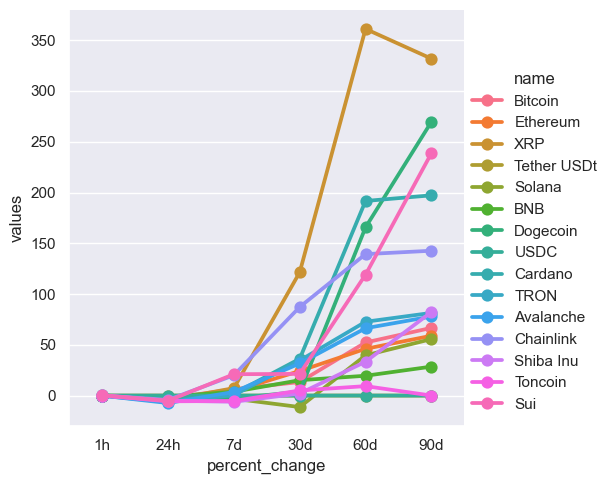

In [190]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [192]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,104072.57813,2024-12-18 11:22:36.593007


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

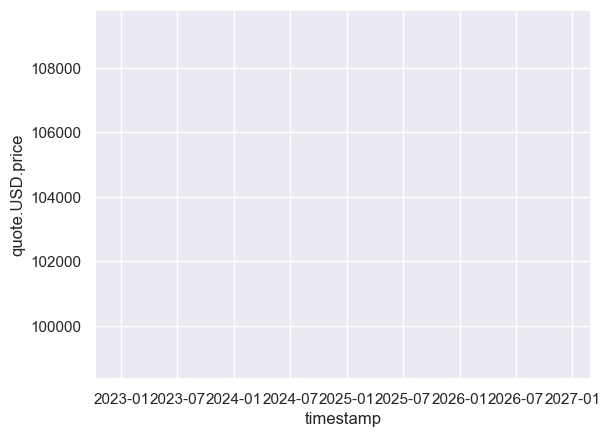

In [194]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)